#### Nama     : Ammar Khaq Baasir
#### Email    : ammarbaasir19@gmail.com
#### Linkedin : https://www.linkedin.com/in/ammar-baasir-973873234/
#### Github   : https://github.com/AmmarBaasir19

# Marketing A/B Testing

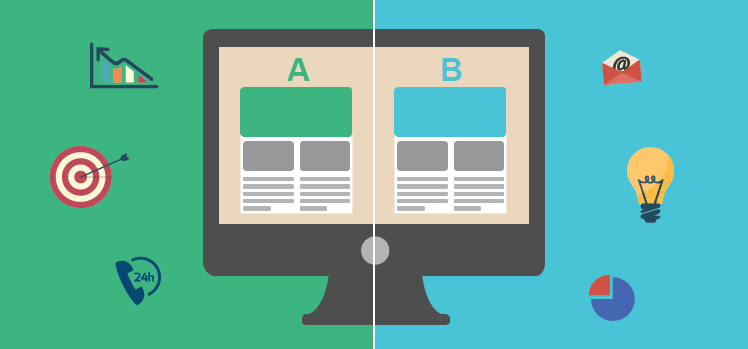

A/B Testing merupakan metode eksperimen di bidang pemasaran (marketing) yang digunakan untuk membandingkan dua versi dari suatu elemen dengan tujuan mengidentifikasi elemen mana yang memberikan hasil yang baik. 

### A/B Testing for Marketing Campaign

Dataset : https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data

Terdapat sebuah perusahaan pemasaran yang ingin menjalankan sebuah campaign diberbagai media seperti **web page, page element, banner, etc.**. perusahaan memiliki kendala dimana **biaya dari campaign sangat terbatas** perusahaan menginginkan biaya campaign yang mereka keluarkan dapat tepat sasaran (tepat kepada customer) yang benar - benar tertarik dengan campaign dan cenderung memberikan respon positif terhadap campaign mereka. masalah selanjutnya yakni perusahaan ini tidak mengetahui apakah campaign yang mereka pasang diberbagai media ini bisa berhasil? dan pada media mana campaign ini menarik perhatian para customer?. perusahaan menyadari bahwa pasar atau market mereka sangatlah kompleks dan perlu dilakukan beberapa eksperiment untuk bisa mendapatkan sebuah insight ataupun formula yang tepat. maka dari itu terciptalah sebuah ide untuk mengumpulkan data - data campaign yang telah mereka lakukan sebelumnya. data - data ini dikumpulkan untuk dilakukan analisis berdasarkan kelompok - kelompok tersebut dan untuk mengetahui apakah campaign tersebut berhasil?. selain itu, data ini diharapkan dapat memberikan informasi mengenai berapa banyak yang dapat diperoleh oleh perusahaan dari campaign tersebut, dan apakah perbedaan antar kelompok tersebut signifikan secara statistik.

### Satge 1 : Business Problem
1. Apa problem yang ingin diselesaikan dari dataset tersebut?<br>

2. Sebagai siapa kalian pada dataset tersebut? <br>
   Answer : Data Scientist In Marketing
3. Apa goal yang ingin dicapai? <br>
   
4. Apa objective yang sesuai dengan goal tersebut?<br>

5. Apa Business Metrics yang cocok untuk mengukur ketercapaian objective tersebut?<br>


### Stage 2 : Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(f"Pandas Version : {pd.__version__}")
print(f"Numpy Version : {np.__version__}")
print(f"Matplotlib Version : {matplotlib.__version__}")
print(f"Seaborn Version : {sns.__version__}")

Pandas Version : 2.1.1
Numpy Version : 1.26.0
Matplotlib Version : 3.8.0
Seaborn Version : 0.13.0


#### Read Dataset

In [3]:
df = pd.read_csv('marketing_AB.csv')
df.sample(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
80915,80915,1161794,ad,False,8,Sunday,17
588083,588083,1380378,ad,False,2,Tuesday,23
375175,375175,1055534,ad,False,7,Tuesday,17
503866,503866,1000360,ad,False,2,Sunday,13
153231,153231,1029498,ad,False,124,Sunday,14


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

#### 2.1. Descriptive Statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [6]:
df_value = df.drop(df[['user id', 'total ads']], axis=1)
for column in df_value.columns:
    print(f"Columns : \033[1m{column}\033[0m")
    print(f"Value Counts : {df_value[column].value_counts()}")
    print()

Columns : test group
Value Counts : test group
ad     564577
psa     23524
Name: count, dtype: int64

Columns : converted
Value Counts : converted
False    573258
True      14843
Name: count, dtype: int64

Columns : most ads day
Value Counts : most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64

Columns : most ads hour
Value Counts : most ads hour
13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: count, dtype: int64



In [7]:
df_des = df[['total ads', 'most ads hour']]
df_des.describe()

,total ads,most ads hour
count,588101.000000,588101.000000
mean,24.820876,14.469061
std,43.715181,4.834634
min,1.000000,0.000000
25%,4.000000,11.000000
50%,13.000000,14.000000
75%,27.000000,18.000000
max,2065.000000,23.000000


In [8]:
for val_col in df.columns:
    print(f"Kolom : {val_col}")
    print(f"Jumlah Data Duplicate : {df.duplicated().sum()}")
    print()

Kolom : user id
Jumlah Data Duplicate : 0

Kolom : test group
Jumlah Data Duplicate : 0

Kolom : converted
Jumlah Data Duplicate : 0

Kolom : total ads
Jumlah Data Duplicate : 0

Kolom : most ads day
Jumlah Data Duplicate : 0

Kolom : most ads hour
Jumlah Data Duplicate : 0



**NOTE :**  
- Tidak terdapat data null pada setiap kolomnya
- Tidak terdapat nilai summary yang aneh
- Terdapat kolom yang memiliki tipe data kurang sesuai dan perlu dilakukan perubahan yakni kolom **converted**
- Terdapat nama kolom yang perlu dilakukan pengubahan yakni kolom **test group**

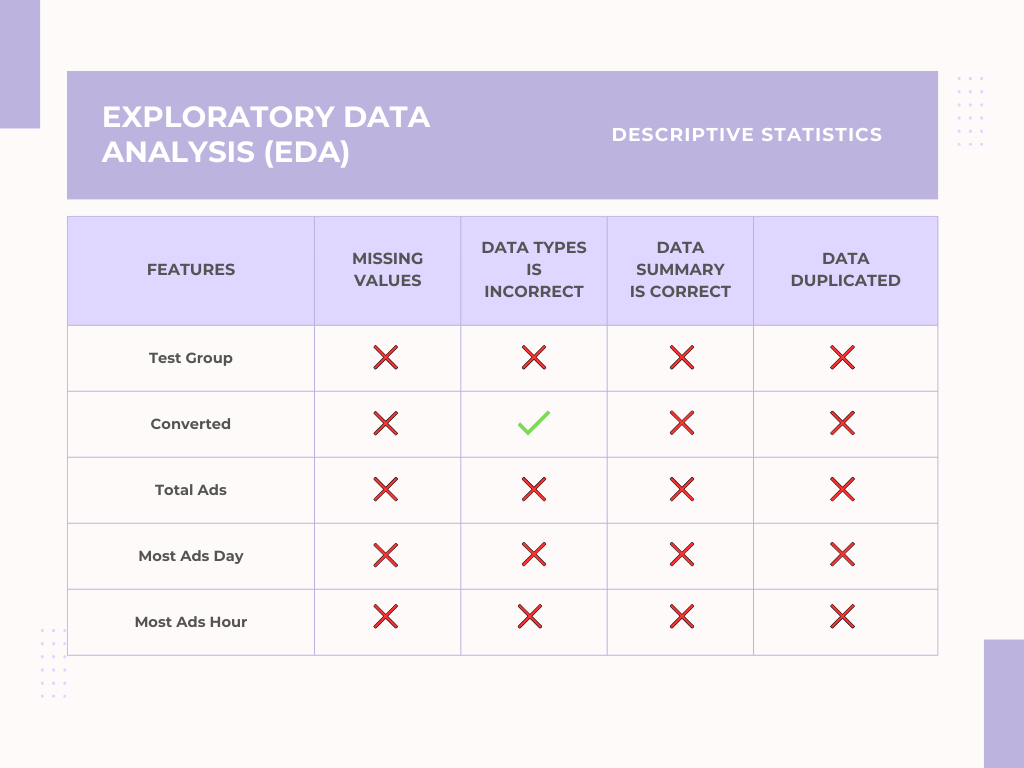

#### 2.2. Univariate Analysis

In [9]:
df_uni = df.drop('total ads', axis=1)
df_uni = df_uni[['test group', 'converted', 'most ads day', 'most ads hour', 'user id']]
df_uni

,test group,converted,most ads day,most ads hour,user id
0,ad,False,Monday,20,1069124
1,ad,False,Tuesday,22,1119715
2,ad,False,Tuesday,18,1144181
3,ad,False,Tuesday,10,1435133
4,ad,False,Friday,14,1015700
...,...,...,...,...,...
588096,ad,False,Tuesday,23,1278437
588097,ad,False,Tuesday,23,1327975
588098,ad,False,Tuesday,23,1038442
588099,ad,False,Tuesday,23,1496395


In [10]:
df_uni_group = df_uni.groupby(['test group', 'converted'])['user id'].count().reset_index()
df_uni_group

,test group,converted,user id
0,ad,False,550154
1,ad,True,14423
2,psa,False,23104
3,psa,True,420


In [11]:
df_tot_user = df_uni.groupby('test group')['user id'].count().reset_index()
df_tot_user

,test group,user id
0,ad,564577
1,psa,23524


In [12]:
df_uni_group1 = df_uni_group.merge(df_tot_user, on='test group', suffixes=('', '_total'))
df_uni_group1

,test group,converted,user id,user id_total
0,ad,False,550154,564577
1,ad,True,14423,564577
2,psa,False,23104,23524
3,psa,True,420,23524


In [13]:
df_uni_group1['percentage'] = round(((df_uni_group1['user id']/df_uni_group1['user id_total']) * 100), 2)
df_uni_group1

,test group,converted,user id,user id_total,percentage
0,ad,False,550154,564577,97.45
1,ad,True,14423,564577,2.55
2,psa,False,23104,23524,98.21
3,psa,True,420,23524,1.79


In [14]:
df_uni_stacked = df_uni_group1.pivot_table(index='test group', columns='converted', values='percentage')
df_uni_stacked

converted,False,True
test group,,
ad,97.45,2.55
psa,98.21,1.79


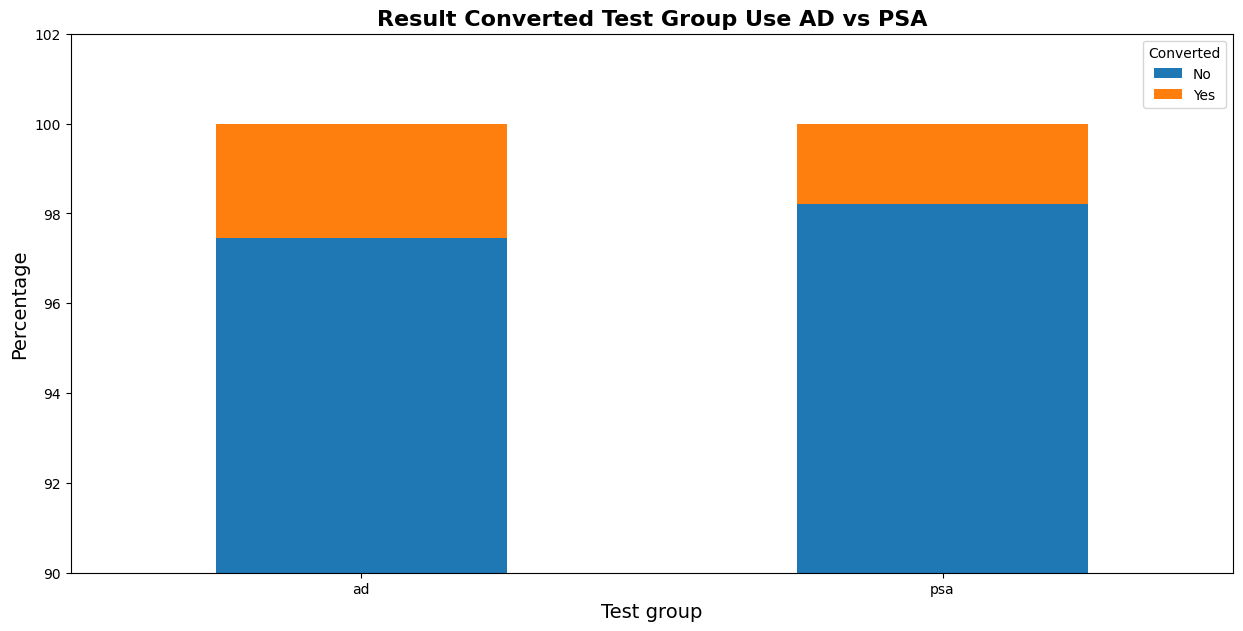

In [15]:
df_uni_stacked.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.xlabel('Test group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.ylim(90, 102)

label = ['No', 'Yes']
plt.legend(loc='upper right', title='Converted', labels=label)
plt.title('Result Converted Test Group Use AD vs PSA', fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [16]:
df_uni_psa = df_uni_group1[df_uni_group1['test group'] == 'psa']
df_uni_psa

,test group,converted,user id,user id_total,percentage
2,psa,False,23104,23524,98.21
3,psa,True,420,23524,1.79


In [17]:
df_uni_ad = df_uni_group1[df_uni_group1['test group'] == 'ad']
df_uni_ad

,test group,converted,user id,user id_total,percentage
0,ad,False,550154,564577,97.45
1,ad,True,14423,564577,2.55


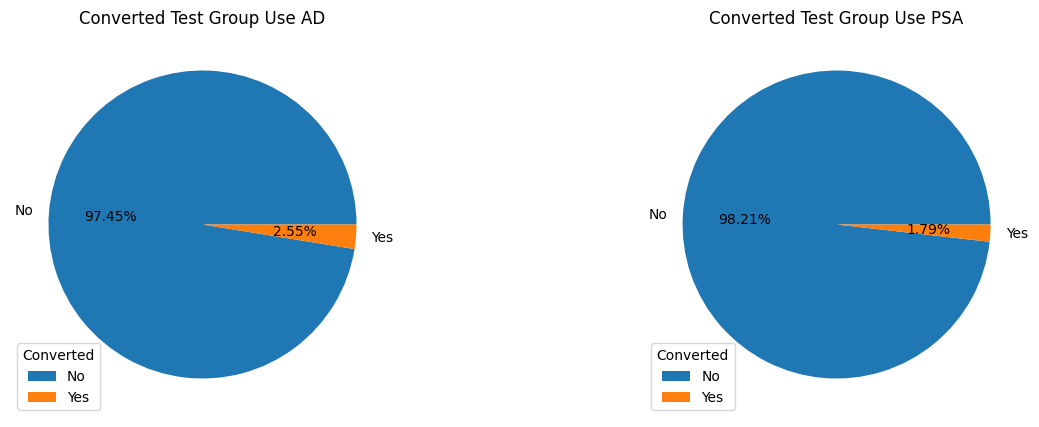

In [18]:
label=['No', 'Yes']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].pie(df_uni_ad['percentage'], 
          labels=label,
          autopct='%1.2f%%')
ax[0].set_title('Converted Test Group Use AD')
ax[0].legend(loc='lower left', title='Converted')

ax[1].pie(df_uni_psa['percentage'], 
          labels=label,
          autopct='%1.2f%%')
ax[1].set_title('Converted Test Group Use PSA')
ax[1].legend(loc='lower left', title='Converted')

plt.show()

#### 2.3. Multivariate Analysis

#### 2.4. Business Insight

userid merepresentasikan bahwa 1 user id merupakan 1 user (customer) dan tidak terdapat userid yang duplicated

In [19]:
df_uni_day = df_uni.groupby(['most ads day', 'converted'])['user id'].count().reset_index()
df_uni_day

,most ads day,converted,user id
0,Friday,False,90551
1,Friday,True,2057
2,Monday,False,84216
3,Monday,True,2857
4,Saturday,False,79941
5,Saturday,True,1719
6,Sunday,False,83301
7,Sunday,True,2090
8,Thursday,False,81192
9,Thursday,True,1790


In [20]:
df_uni_day_user = df_uni_day.groupby('most ads day')['user id'].sum().reset_index()
df_uni_day_user

,most ads day,user id
0,Friday,92608
1,Monday,87073
2,Saturday,81660
3,Sunday,85391
4,Thursday,82982
5,Tuesday,77479
6,Wednesday,80908


In [21]:
df_uni_day_fin = df_uni_day.merge(df_uni_day_user, on='most ads day', suffixes=('', '_total'))
df_uni_day_fin

,most ads day,converted,user id,user id_total
0,Friday,False,90551,92608
1,Friday,True,2057,92608
2,Monday,False,84216,87073
3,Monday,True,2857,87073
4,Saturday,False,79941,81660
5,Saturday,True,1719,81660
6,Sunday,False,83301,85391
7,Sunday,True,2090,85391
8,Thursday,False,81192,82982
9,Thursday,True,1790,82982


In [22]:
df_uni_day_fin['percentage'] = round(((df_uni_day_fin['user id']/df_uni_day_fin['user id_total']) * 100), 2)
df_uni_day_fin

,most ads day,converted,user id,user id_total,percentage
0,Friday,False,90551,92608,97.78
1,Friday,True,2057,92608,2.22
2,Monday,False,84216,87073,96.72
3,Monday,True,2857,87073,3.28
4,Saturday,False,79941,81660,97.89
5,Saturday,True,1719,81660,2.11
6,Sunday,False,83301,85391,97.55
7,Sunday,True,2090,85391,2.45
8,Thursday,False,81192,82982,97.84
9,Thursday,True,1790,82982,2.16


In [23]:
df_uni_day_fin1 = df_uni_day_fin.pivot_table(index='most ads day', columns='converted', values='percentage')
df_uni_day_fin1

converted,False,True
most ads day,,
Friday,97.78,2.22
Monday,96.72,3.28
Saturday,97.89,2.11
Sunday,97.55,2.45
Thursday,97.84,2.16
Tuesday,97.02,2.98
Wednesday,97.51,2.49


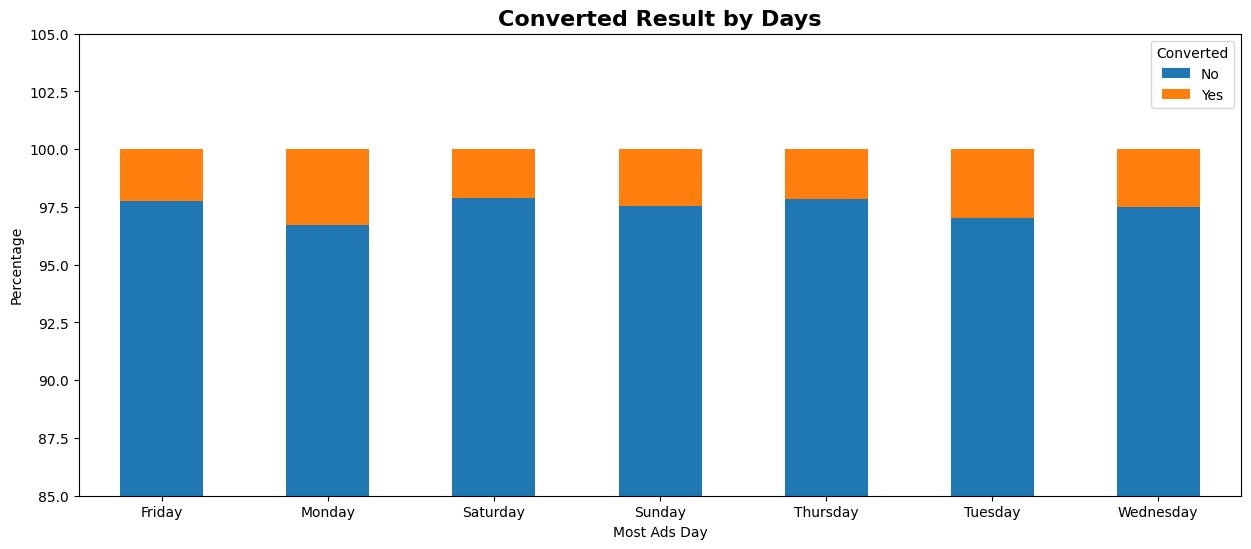

In [33]:
label = ['No', 'Yes']
df_uni_day_fin1.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.title('Converted Result by Days', fontsize=16, fontweight='bold')
plt.xlabel('Most Ads Day')
plt.ylabel('Percentage')
plt.ylim(85, 105)
plt.xticks(rotation=0)
plt.legend(loc='upper right', title='Converted', labels=label)
plt.show()

In [25]:
df_uni_day_con = df_uni.groupby(['test group', 'most ads day', 'converted'])['user id'].count().reset_index()
df_uni_day_con

,test group,most ads day,converted,user id
0,ad,Friday,False,86810
1,ad,Friday,True,1995
2,ad,Monday,False,80793
3,ad,Monday,True,2778
4,ad,Saturday,False,77123
5,ad,Saturday,True,1679
6,ad,Sunday,False,80305
7,ad,Sunday,True,2027
8,ad,Thursday,False,77366
9,ad,Thursday,True,1711


In [26]:
df_uni_day_user_con = df_uni.groupby(['test group', 'most ads day'])['user id'].count().reset_index()
df_uni_day_user_con

,test group,most ads day,user id
0,ad,Friday,88805
1,ad,Monday,83571
2,ad,Saturday,78802
3,ad,Sunday,82332
4,ad,Thursday,79077
5,ad,Tuesday,74572
6,ad,Wednesday,77418
7,psa,Friday,3803
8,psa,Monday,3502
9,psa,Saturday,2858


In [27]:
df_uni_day_con = df_uni_day_con.merge(df_uni_day_user_con, on=['test group', 'most ads day'], suffixes=('', '_total'))
df_uni_day_con

,test group,most ads day,converted,user id,user id_total
0,ad,Friday,False,86810,88805
1,ad,Friday,True,1995,88805
2,ad,Monday,False,80793,83571
3,ad,Monday,True,2778,83571
4,ad,Saturday,False,77123,78802
5,ad,Saturday,True,1679,78802
6,ad,Sunday,False,80305,82332
7,ad,Sunday,True,2027,82332
8,ad,Thursday,False,77366,79077
9,ad,Thursday,True,1711,79077


In [28]:
df_uni_day_con['percentage'] = round(((df_uni_day_con['user id']/df_uni_day_con['user id_total']) * 100), 2)
df_uni_day_con

,test group,most ads day,converted,user id,user id_total,percentage
0,ad,Friday,False,86810,88805,97.75
1,ad,Friday,True,1995,88805,2.25
2,ad,Monday,False,80793,83571,96.68
3,ad,Monday,True,2778,83571,3.32
4,ad,Saturday,False,77123,78802,97.87
5,ad,Saturday,True,1679,78802,2.13
6,ad,Sunday,False,80305,82332,97.54
7,ad,Sunday,True,2027,82332,2.46
8,ad,Thursday,False,77366,79077,97.84
9,ad,Thursday,True,1711,79077,2.16


In [29]:
df_uni_day_con_ad = df_uni_day_con[df_uni_day_con['test group'] == 'ad']
df_uni_day_con_ad

,test group,most ads day,converted,user id,user id_total,percentage
0,ad,Friday,False,86810,88805,97.75
1,ad,Friday,True,1995,88805,2.25
2,ad,Monday,False,80793,83571,96.68
3,ad,Monday,True,2778,83571,3.32
4,ad,Saturday,False,77123,78802,97.87
5,ad,Saturday,True,1679,78802,2.13
6,ad,Sunday,False,80305,82332,97.54
7,ad,Sunday,True,2027,82332,2.46
8,ad,Thursday,False,77366,79077,97.84
9,ad,Thursday,True,1711,79077,2.16


In [30]:
df_uni_day_con_ad = df_uni_day_con_ad.pivot_table(index='most ads day', columns='converted', values='percentage')
df_uni_day_con_ad

converted,False,True
most ads day,,
Friday,97.75,2.25
Monday,96.68,3.32
Saturday,97.87,2.13
Sunday,97.54,2.46
Thursday,97.84,2.16
Tuesday,96.96,3.04
Wednesday,97.46,2.54


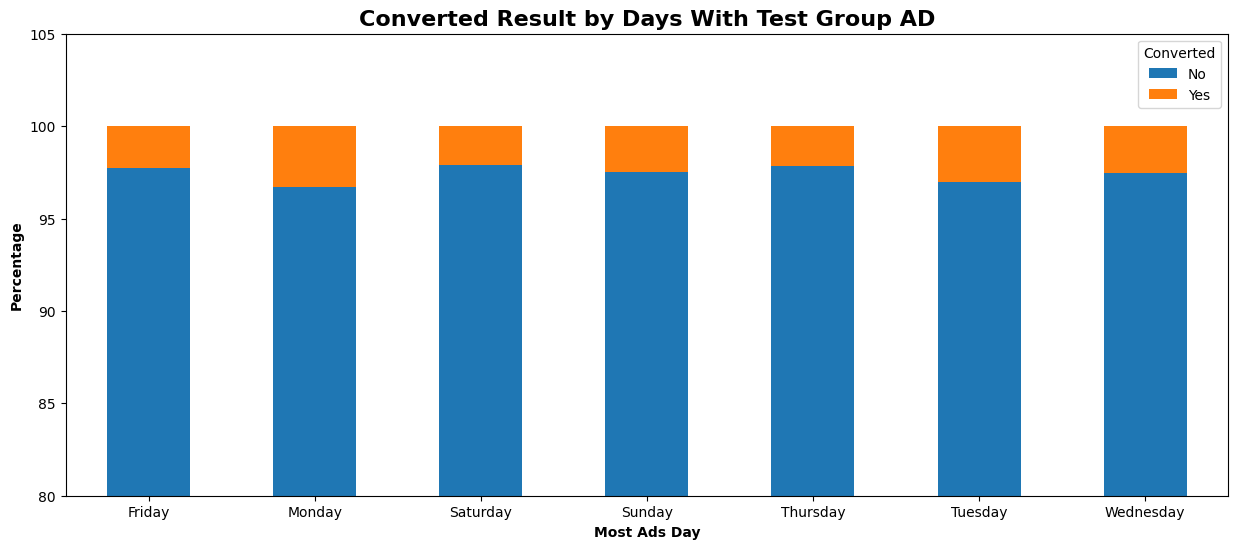

In [31]:
label = ['No', 'Yes']
df_uni_day_con_ad.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.xticks(rotation=0)
plt.xlabel('Most Ads Day', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.ylim(80, 105)
plt.title('Converted Result by Days With Test Group AD', fontsize=16, fontweight='bold')
plt.legend(title='Converted', labels=label)

plt.show()

In [34]:
df_uni_day_con_psa = df_uni_day_con[df_uni_day_con['test group'] == 'psa']
df_uni_day_con_psa

,test group,most ads day,converted,user id,user id_total,percentage
14,psa,Friday,False,3741,3803,98.37
15,psa,Friday,True,62,3803,1.63
16,psa,Monday,False,3423,3502,97.74
17,psa,Monday,True,79,3502,2.26
18,psa,Saturday,False,2818,2858,98.60
19,psa,Saturday,True,40,2858,1.40
20,psa,Sunday,False,2996,3059,97.94
21,psa,Sunday,True,63,3059,2.06
22,psa,Thursday,False,3826,3905,97.98
23,psa,Thursday,True,79,3905,2.02


In [35]:
df_uni_day_con_psa = df_uni_day_con_psa.pivot_table(index='most ads day', columns='converted', values='percentage')
df_uni_day_con_psa

converted,False,True
most ads day,,
Friday,98.37,1.63
Monday,97.74,2.26
Saturday,98.60,1.40
Sunday,97.94,2.06
Thursday,97.98,2.02
Tuesday,98.56,1.44
Wednesday,98.42,1.58


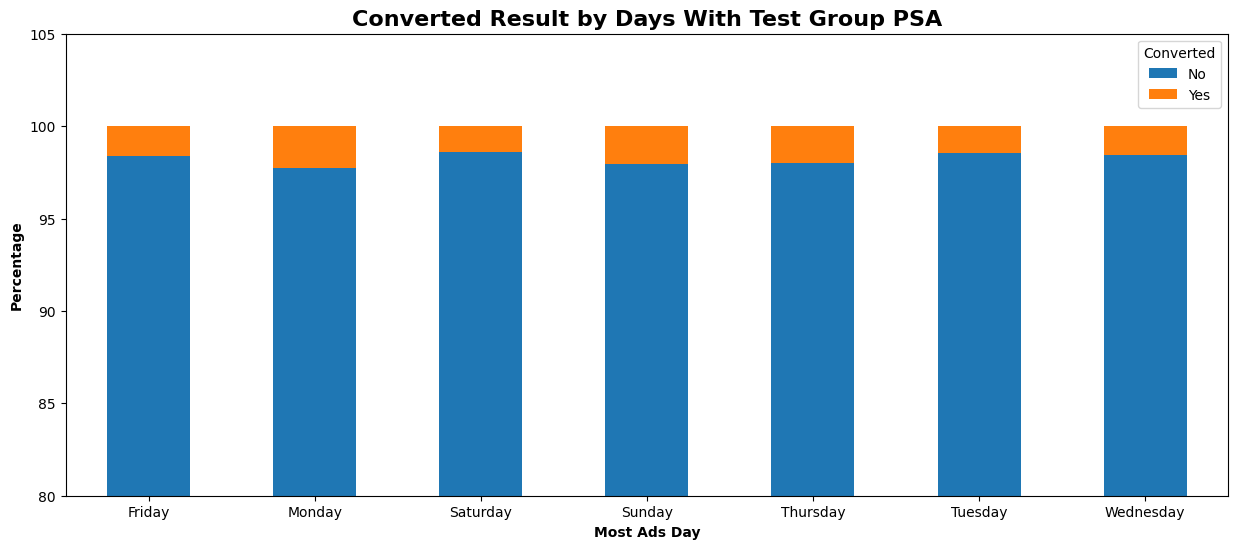

In [36]:
label = ['No', 'Yes']
df_uni_day_con_psa.plot(kind='bar', stacked=True, figsize=(15, 6))

plt.xticks(rotation=0)
plt.xlabel('Most Ads Day', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.ylim(80, 105)
plt.title('Converted Result by Days With Test Group PSA', fontsize=16, fontweight='bold')
plt.legend(title='Converted', labels=label)

plt.show()

In [62]:
df_uni_hour = df_uni.groupby(['most ads hour', 'converted'])['user id'].count().reset_index()
df_uni_hour

,most ads hour,converted,user id
0,0,False,5434
1,0,True,102
2,1,False,4740
3,1,True,62
4,2,False,5294
5,2,True,39
6,3,False,2651
7,3,True,28
8,4,False,711
9,4,True,11


In [65]:
df_uni_hour_tot = df_uni_hour.groupby('most ads hour')['user id'].sum().reset_index()
df_uni_hour_tot

,most ads hour,user id
0,0,5536
1,1,4802
2,2,5333
3,3,2679
4,4,722
5,5,765
6,6,2068
7,7,6405
8,8,17627
9,9,31004


In [66]:
df_uni_hour = df_uni_hour.merge(df_uni_hour_tot, on='most ads hour', suffixes=('','_total'))
df_uni_hour                     

,most ads hour,converted,user id,user id_total
0,0,False,5434,5536
1,0,True,102,5536
2,1,False,4740,4802
3,1,True,62,4802
4,2,False,5294,5333
5,2,True,39,5333
6,3,False,2651,2679
7,3,True,28,2679
8,4,False,711,722
9,4,True,11,722


In [67]:
df_uni_hour['percentage'] = round(((df_uni_hour['user id']/df_uni_hour['user id_total'])*100), 2)
df_uni_hour

,most ads hour,converted,user id,user id_total,percentage
0,0,False,5434,5536,98.16
1,0,True,102,5536,1.84
2,1,False,4740,4802,98.71
3,1,True,62,4802,1.29
4,2,False,5294,5333,99.27
5,2,True,39,5333,0.73
6,3,False,2651,2679,98.95
7,3,True,28,2679,1.05
8,4,False,711,722,98.48
9,4,True,11,722,1.52


In [68]:
df_uni_hour = df_uni_hour.pivot_table(index='most ads hour', columns='converted', values='percentage')
df_uni_hour

converted,False,True
most ads hour,,
0,98.16,1.84
1,98.71,1.29
2,99.27,0.73
3,98.95,1.05
4,98.48,1.52
5,97.91,2.09
6,97.78,2.22
7,98.19,1.81
8,98.05,1.95


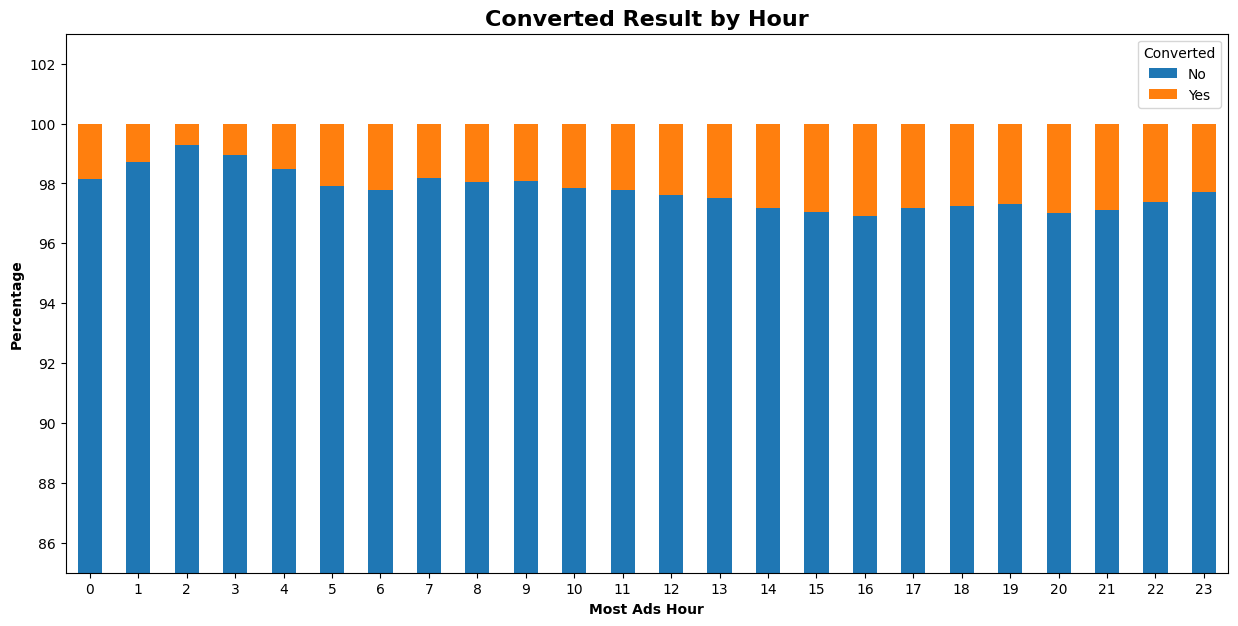

In [83]:
label = ['No', 'Yes']
df_uni_hour.plot(kind='bar', stacked=True, figsize=(15,7))

plt.xlabel('Most Ads Hour', fontweight='bold')
plt.ylabel('Percentage', fontweight='bold')
plt.title('Converted Result by Hour', fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.ylim(85, 103)
plt.legend(loc='upper right', labels=label, title='Converted')

plt.show()

In [81]:
## dibandingkan rata - rata convert antara diatas jam 1 dan dibawah jam 1

### Stage 3 : Data Pre-Processing

#### 3.1. Data Cleansing (Data Cleaning)

Data cleaning merupakan proses memastikan keakuratan, konsistensi, dan kegunaan data dalam kumpulan data. prosesnya yang dilakukan adalah mendeteksi kesalahan data atau data yang corrupt dan memperbaiki atau menghapus data sesuai kebutuhan. <br>
<br>
Berikut merupakan beberapa alasan mengapa data cleaning perlu dilakukan: 
- Meningkatkan efisiensi kerja karena proses ini akan memudahkan tim pengolah data untuk menemukan apa yang dibutuhkan dari data.
- Tingkat error yang lebih rendah juga akan mendatangkan kepuasan pelanggan dan mengurangi beban kerja tim. 
- Membantu tim data dalam memetakan beberapa fungsi data yang berbeda. proses ini juga akan membuat tim data lebih mudah mengenal data dan mempelajari asalnya

In [148]:
df_prep = df[['user id',
              'test group',
              'converted', 
              'total ads',
              'most ads day',
              'most ads hour'
             ]]
df_prep

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [149]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 23.0+ MB


In [156]:
# Handling outlier

In [157]:
# Feature Encoding

#### 3.2. Feature Engineering

### Stage 4 : A/B Testing

A/B Testing merupakan metode eksperimental yang digunakan dalam ilmu data dan pemasaran untuk membandingkan dua versi dari suatu elemen, seperti **web pages, page element, banner, e.t.c**, dengan tujuan untuk menentukan mana yang memberikan hasil yang lebih baik. A/B Testing membantu perusahaan atau tim data membuat keputusan berdasarkan bukti empiris dan data. 

### Stage 5 : Insight Business